## Liver Disease Prediction
Create predictive models to predict the stage of liver Cirrhosis using 18 clinical features. Cirrhosis damages the liver from a variety of causes leading to scarring and liver failure.

Hepatitis and chronic alcohol abuse are frequent causes of the disease. Liver damage caused by cirrhosis can't be undone, but further damage can be limited. Treatments focus on the underlying cause. In advanced cases, a liver transplant may be required. Predicting the stage of cirrhosis and beginning the treatment before it's too late can prevent the fatal consequences of the disease.

In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np

In [3]:
df=pd.read_csv('train_dataset.csv')

In [4]:
df.head(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0


In [5]:
df.drop(columns=['ID'],inplace=True)

### Feature Analysis

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df['Drug'].value_counts()

D-penicillamine    2434
Placebo            2341
Name: Drug, dtype: int64

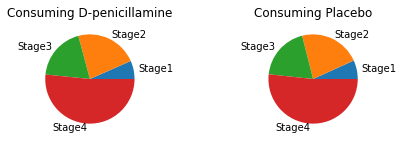

In [87]:
figure,(ax1, ax2)=plt.subplots(1,2)
ax1.set_title('Consuming D-penicillamine')
ax1.pie(df[['Drug','Stage']][df['Drug']=='D-penicillamine'].groupby(['Stage']).count()['Drug'],labels=['Stage1','Stage2','Stage3','Stage4']);
ax2.set_title('Consuming Placebo')
ax2.pie(df[['Drug','Stage']][df['Drug']=='Placebo'].groupby(['Stage']).count()['Drug'],labels=['Stage1','Stage2','Stage3','Stage4']);
plt.subplots_adjust(wspace=1)

In [88]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [92]:
df['Status'].unique()

array(['CL', 'C', 'D'], dtype=object)

In [93]:
print(df[['Status','Stage']][df['Status']=='CL'].value_counts())
print(df[['Status','Stage']][df['Status']=='C'].value_counts())
print(df[['Status','Stage']][df['Status']=='D'].value_counts())

Status  Stage
CL      4.0      280
        3.0      119
        2.0      102
        1.0       37
dtype: int64
Status  Stage
C       4.0      1928
        2.0       775
        3.0       684
        1.0       256
dtype: int64
Status  Stage
D       4.0      1298
        2.0       630
        3.0       519
        1.0       172
dtype: int64
